# Project: Investigate a Dataset - No Show Appointments 

### Kagglev2-may-2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
1. ‘ScheduledDay’ tells us on what day the patient set up their appointment.
2. ‘Neighborhood’ indicates the location of the hospital.
3. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
4. Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

## Questions to answer through this dataset

1. What is the percentage of people showed up vs percentage of people did not show up?
2. What is the influence of Age,Gender and SMS received on show up rate?

In [348]:
#import the packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Load the data first and observe it carefully. As such, understand any necessary changes required by inspecting the data and clean it respectively.

In [349]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [350]:
#inspect the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [351]:
#look for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The Data doesnt contain any Null values.

In [352]:
df.duplicated().sum()

0

There are no duplicate data also to be handled

## Cleaning data
Now that we have observed the data. Lets do the required cleaning process.


In [353]:
#the minimum age was seen as -1. But age cannot be negative.However Just born babies before they turn one can be regarded as zero years
df.query('Age<0')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [354]:
#fill the negative value with mean
df[df['Age']<0]=df['Age'].mean()
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474921e+14,5.675253e+06,37.089219,0.098601,0.197581,0.072200,0.030735,0.022584,0.321361
std,2.560935e+14,7.331033e+04,23.109921,0.317789,0.413104,0.281244,0.204698,0.196282,0.479792
min,3.708887e+01,3.708887e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680571e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725522e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  float64
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  float64
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  float64
 8   Hipertension    110527 non-null  float64
 9   Diabetes        110527 non-null  float64
 10  Alcoholism      110527 non-null  float64
 11  Handcap         110527 non-null  float64
 12  SMS_received    110527 non-null  float64
 13  No-show         110527 non-null  object 
dtypes: float64(9), object(5)
memory usage: 11.8+ MB


PatientId and AppointmentId are very specific and doesnt help us. So we can drop this data

In [356]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [357]:
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No


We observe that certain column names have spelling mistakes. This might be difficult for us while handling the data. Lets change those as well as turn the column names into lower case for futher ease.

In [358]:
df.rename(columns={'Hipertension':'hypertension','Handcap':'handicap','No-show':'no_show'},inplace=True)
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No


Lets convert all the column names to lower case for ease.

In [359]:
df.rename(columns=lambda x: x.lower(),inplace=True)
df

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No


Converting the no_show values into 0 and 1 for further ease

In [360]:
df["no_show"] = np.where((df.no_show=="Yes"), 1, 0)
df

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   gender          110527 non-null  object 
 1   scheduledday    110527 non-null  object 
 2   appointmentday  110527 non-null  object 
 3   age             110527 non-null  float64
 4   neighbourhood   110527 non-null  object 
 5   scholarship     110527 non-null  float64
 6   hypertension    110527 non-null  float64
 7   diabetes        110527 non-null  float64
 8   alcoholism      110527 non-null  float64
 9   handicap        110527 non-null  float64
 10  sms_received    110527 non-null  float64
 11  no_show         110527 non-null  int32  
dtypes: float64(7), int32(1), object(4)
memory usage: 9.7+ MB


The Datatype of scheduledday and appointmentday are object. So we convert them to datetime datatype.

In [362]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduledday']=pd.to_datetime(df['scheduledday'])

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  object             
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  float64            
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  float64            
 6   hypertension    110527 non-null  float64            
 7   diabetes        110527 non-null  float64            
 8   alcoholism      110527 non-null  float64            
 9   handicap        110527 non-null  float64            
 10  sms_received    110527 non-null  float64            
 11  no_show         110527 non-null  int32              
dtypes: datetime64[ns, UTC](2), float64(7), int32(1), object(2)
memory usage:

<a id='eda'></a>
## Exploratory Data Analysis

Cleaning the data is done. To Answer the questions we have to dive further into analysis.

### Research Question 1. What is the percentage of people showed up vs percentage of people did not show up?

In [364]:
#find percentage of people who showed up
show=df[df['no_show']==0]
s=len(show)*100/len(df['no_show'])

In [365]:
#find percentage of people who did not show up
not_showed=df[df['no_show']==1]
ns=len(not_showed)*100/len(df['no_show'])

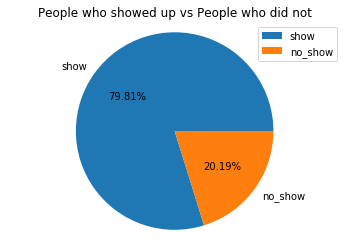

In [366]:
#make a pie chart to show the percentages visually
label=['show','no_show']
plt.pie([s,ns],labels=label,autopct='%1.2f%%')
plt.axis('equal')
plt.title('People who showed up vs People who did not')
plt.legend()

The percentage of patients who showed up are greater than percentage of people who did not show up

### Research Question 2  What is the influence of Age, Gender and SMS received on show up rate?

Text(0.5, 1.0, 'Age Distribution for overall data')

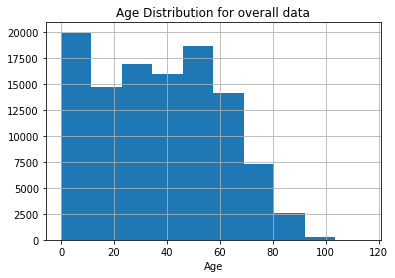

In [367]:
#lets look at the Age first
df.age.value_counts()
df.age.hist()
plt.xlabel('Age')
plt.title('Age Distribution for overall data')

In [368]:
#overall mean
df.age.mean()

37.08921882322158

In [369]:
#mean age of people who showed up
show['age'].mean()

37.79049620073249

In [370]:
#mean of age of people who did not show up
not_showed['age'].mean()

34.31766656212196

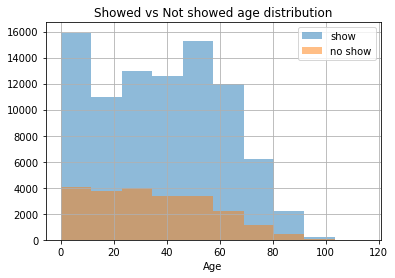

In [371]:
show['age'].hist(alpha=0.5,label='show')
not_showed['age'].hist(alpha=0.5,label='no show')
plt.xlabel('Age')
plt.title('Showed vs Not showed age distribution')
plt.legend()

Both the categories are right skewed and mid aged younger people are more likely to show up and have an appointment

In [372]:
#Lets look at the gender
num=show.gender.value_counts()
num

F                    57245
M                    30962
37.08887421173107        1
Name: gender, dtype: int64

Since gender is not numerical. We have to plot the graphs with the help of valuecounts

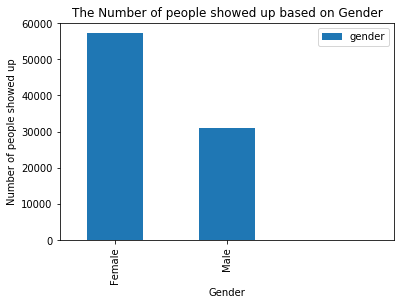

In [373]:
show['gender'].value_counts().plot(kind='bar')
plt.xticks(np.arange(2), ('Female', 'Male'))
plt.xlabel("Gender")
plt.ylabel("Number of people showed up")
plt.title("The Number of people showed up based on Gender")
plt.legend()

Females are more likely to show up as compared to Males

Analysis whether sending sms will help them show up to their appointment or not

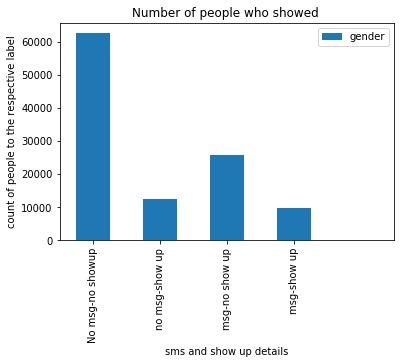

In [374]:
df.groupby(['sms_received','no_show']).count()['gender'].plot(kind='bar')
plt.xticks(np.arange(4), ('No msg-no showup', 'no msg-show up', 'msg-no show up', 'msg-show up'))
plt.xlabel("sms and show up details")
plt.ylabel("count of people to the respective label")
plt.title("Number of people who showed ")
plt.legend()

There is no relation to say patients who received message are likely to show up to their appointment

<a id='conclusions'></a>
## Conclusions

1. The Percentage of patients who showed up is 80% and patients who did not show up are 20% in the entire data 
2. The Age is right skewed with the mean age being 37
3. The mean age of patients who showed up is also close to 37 whereas the mean age of patients who did not show up is close to 34.
4. Both the mean age of patients showed up and not showed up is also right skewed. 
5. According to the bar graph Females are more likely to show up to their appointment as compared to Males
6. SMS is not a major a factor in terms of deciding the patients showing up to the appointment. By observing all combinations there is no possibility that people who received message turned up to their appointment.
7. Patients who received no message yet showed up are greater than patients who received the message but did not turn up.